---

## Описание проекта

<em> Я маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. <em>

### Цель исследования

<em> Узнать откуда приходят пользователи и какими устройствами они пользуются; <em>  <br>
    
<strong><em>  Проанализировать: <strong><em>  <br>
    
- <em> Cколько стоит привлечение пользователей из различных рекламных каналов; <br>
- <em> Сколько денег приносит каждый клиент; <br>
- <em> Когда расходы на привлечение клиента окупаются; <br>
- <em> Какие факторы мешают привлечению клиентов. <br>

###  Ход исследования

1. <em> Выполнить обзор и предобработку данных; <em>
2. <em> Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии; <em>
3. <em> Исследовательский анализ данных; <em>
4. <em> Анализ маркетинговой компании; <em>
5. <em> Оценка окупаемости рекламы; <em>
6. <em> Написать выводы и рекомендации. <em>

## Обзор и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    print('FileNotFoundError')

In [3]:
pd.DataFrame(round(visits.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
User Id,0.000000
Region,0.000000
Device,0.000000
Channel,0.000000
Session Start,0.000000
Session End,0.000000


In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits.duplicated().sum()

0

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [10]:
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
User Id,0.000000
Event Dt,0.000000
Revenue,0.000000


In [11]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [15]:
pd.DataFrame(round(costs.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
dt,0.000000
Channel,0.000000
costs,0.000000


In [16]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [19]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [20]:
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

0

<strong> Мы выполнили предобработку данных: <strong>
- <em> Столбцы приведены к нижнему регистру, пропуски между словами в названии убраны; <em>
- <em> Столбцы session_start, session_end, event_dt и dt преобразованы к нужному типу данных; <em>
- <em> Дубликатов и пропусков нет. <em>

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

<em> Это функции для вычисления значений метрик: 

- <em> `get_profiles()` — для создания профилей пользователей, 
- <em> `get_retention()` — для подсчёта Retention Rate, 
- <em> `get_conversion()` — для подсчёта конверсии,
- <em> `get_ltv()` — для подсчёта LTV. 

<em> А также функции для построения графиков: 

- <em> `filter_data()` — для сглаживания данных,
- <em> `plot_retention()` — для построения графика Retention Rate,
- <em> `plot_conversion()` — для построения графика конверсии,
- <em> `plot_ltv_roi` — для визуализации LTV и ROI. 

### Функция создания пользовательских профилей

In [21]:
def get_profiles(visits, orders, costs):
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, channel, device и region
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first','channel': 'first','device': 'first','region': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # Добавим признак платящих пользователей, проверим, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем затраты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция расчета коэффициента удержания. Retention Rate

In [22]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # присоединяем session_start к профилям по столбцу user_id
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    # вычисляем лайфтайм для каждой сессии в днях
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

### Функция для расчета консверсии. Convertion Rate

In [23]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

### Функция для сглаживания датафрейма

In [24]:
# для каждого столбца применяем скользящее среднее
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для расчёта LTV, CAC, ROI

In [25]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    # добавляем данные о покупках в профили
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицы динамики LTV и ROI    
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time,  
        roi_grouped, 
        roi_in_time,  
    ) 

### Визуализация Retention Rate

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    # во второй ячейке строим кривые удержания неплатящих пользователей
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    # в третьей ячейке — динамика удержания платящих пользователей
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # в чётвертой ячейке — динамика удержания неплатящих пользователей
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Визуализация Convertion Rate

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Визуализация LTV, CAC, ROI

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True,ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- <em> Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей;
- <em> Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны;
- <em> Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства;
- <em> Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
profiles = get_profiles(visits, orders, costs)

In [30]:
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [31]:
min_date = costs['dt'].min()
max_date = costs['dt'].max()
print(f'Минимальная дата привлечения пользователя: {min_date}') 
print(f'Максимальная дата привлечения пользователя: {max_date}')

Минимальная дата привлечения пользователя: 2019-05-01
Максимальная дата привлечения пользователя: 2019-10-27


In [32]:
users_by_country = profiles.query('payer == True').groupby('region').agg ({'payer': 'count'})\
.sort_values('payer',ascending = False)
users_by_country['percent'] = round(users_by_country['payer']* 100/ users_by_country['payer'].sum(),1)
users_by_country

,payer,percent
region,,
United States,6902,77.7
UK,700,7.9
France,663,7.5
Germany,616,6.9


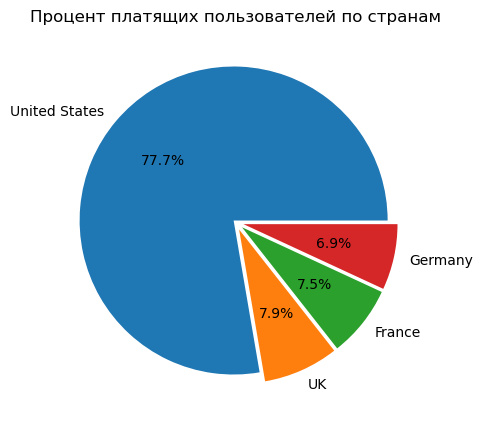

In [33]:
plt.figure(figsize = (10, 5))
explode = [0.02, 0.05, 0.05, 0.05]
plt.pie(users_by_country['percent'], explode = explode, labels = users_by_country.index, autopct='%1.1f%%' )
plt.title("Процент платящих пользователей по странам")
plt.show()

<em> Наибольший процент платящих пользователей из США 77.7%; <br>
В европейских странах платящих пользователей от 6.9 до 7.9%.

In [34]:
region_users = (profiles.groupby('region').agg({'user_id' : 'nunique', 'payer' : 'sum'}).rename(columns = {'user_id' : 'total'})
).sort_values('total',ascending = False)
region_users['percent'] =region_users.payer * 100 / region_users.total
region_users

,total,payer,percent
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


In [35]:
device_users = (profiles.groupby('device').agg({'user_id' : 'nunique', 'payer' : 'sum'}).rename(columns = {'user_id' : 'total'})
    .sort_values('total', ascending = False)
)
device_users['percent'] = device_users.payer * 100 / device_users.total
device_users

,total,payer,percent
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


In [36]:
channel_users = (profiles.groupby('channel').agg({'user_id' : 'nunique', 'payer' : 'sum'}).rename(columns = {'user_id' : 'total'})
    .sort_values('total', ascending = False)
)
channel_users['percent'] = channel_users.payer * 100 / channel_users.total
channel_users

,total,payer,percent
channel,,,
organic,56439,1160,2.055316
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531


<em> Значительное общее число пользователей приходится на США, процент платящих составляет 6.9%; <br>
Наиболее популярным устройсвом является Iphone, число платящих пользователей  6.2%; <br>
Наибольший приток пользователей органический, лидирующие каналы по притоку пользователей FaceBoom и ТipTop, 12.2% и 9.6% платящих пользователей.

In [37]:
users_by_device = profiles.query('payer == True').groupby('device').agg ({'payer': 'count'}).sort_values('payer',ascending = False)
users_by_device['percent'] = round(users_by_device['payer']* 100/ users_by_device['payer'].sum(),2)
users_by_device

,payer,percent
device,,
iPhone,3382,38.08
Android,2050,23.08
Mac,1912,21.53
PC,1537,17.31


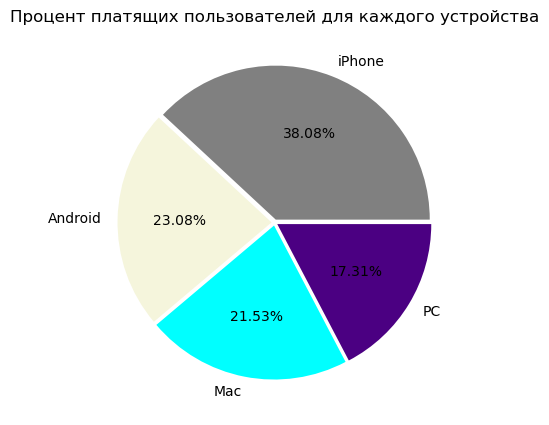

In [38]:
plt.figure(figsize = (10, 5))
colors = ['grey','beige','cyan','indigo']
explode = [0.02, 0.02, 0.02, 0.02]
plt.pie(users_by_device['percent'], colors = colors, explode = explode, labels = users_by_device.index, autopct='%1.2f%%' )
plt.title("Процент платящих пользователей для каждого устройства")
plt.show()

<em> Чаще всего для входа платящие пользователи используют iPhone 38.08%; <br>
Реже Android - 23.08%; <br> 
Mac - 21.53%; <br>
PC 17.31%. 

In [39]:
users_by_channel = profiles.query('payer == True').groupby('channel').agg ({'payer': 'count'}).sort_values('payer',ascending = False)
users_by_channel['percent'] = round(users_by_channel['payer']* 100/ users_by_channel['payer'].sum(),2)
users_by_channel

,payer,percent
channel,,
FaceBoom,3557,40.05
TipTop,1878,21.15
organic,1160,13.06
WahooNetBanner,453,5.10
AdNonSense,440,4.95
RocketSuperAds,352,3.96
LeapBob,262,2.95
OppleCreativeMedia,233,2.62
lambdaMediaAds,225,2.53


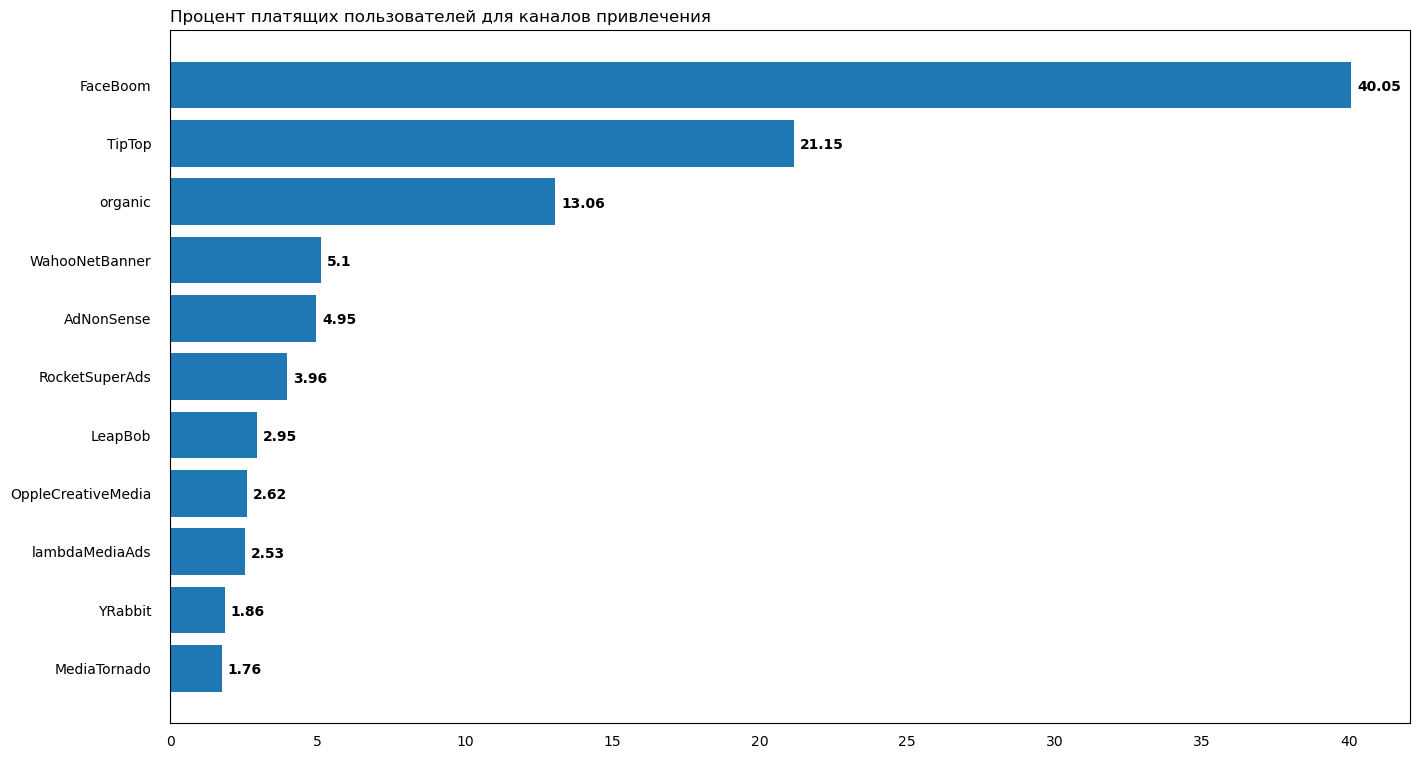

In [40]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(users_by_channel.index, users_by_channel['percent'] )
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 

ax.set_title('Процент платящих пользователей для каналов привлечения',
             loc ='left')
plt.show()

<em> Самый популярный канал привлечения FaceBoom 40.05%; <br> Менее популярный TipTop 21.15% пользователей; <br> Огранических пользователей 13.06%; <br> Остальные каналы вносят менее значительный вклад пользователей < 5.1%.

 - <em> Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
 -  <em> Определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируются;
 - <em> Большая часть пользователей заходит с мобильных устройств;
 - <em> Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, в целом пользователи Apple имеют лучшую конверсию в покупателей. 

## Маркетинг

- <em> Посчитаем общую сумму расходов на маркетинг;
- <em> Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник;
- <em> Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
- <em> Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [41]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum(),1) , 'долларов')

Общая сумма расходов на маркетинг: 105497.3 долларов


In [42]:
costs.groupby('channel').agg ({'costs': 'sum'}).sort_values('costs',ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<em> На TipTop потрачено почти в 2 раза больше чем на FaceBoom, хотя картина по привлеченным платящим пользователям обратная, FaceBoom принёс в 2 раза больше.

In [43]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.month
costs.groupby('costs_month').agg ({'costs': 'sum'}).sort_values('costs_month')

,costs
costs_month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


In [44]:
costs['costs_week'] = costs['dt'].astype('datetime64[M]').dt.isocalendar().week
costs.groupby('costs_week').agg ({'costs': 'sum'}).sort_values('costs_week')

,costs
costs_week,
18,9978.570
22,15090.045
27,16447.060
31,20657.870
35,22441.340
40,20882.415


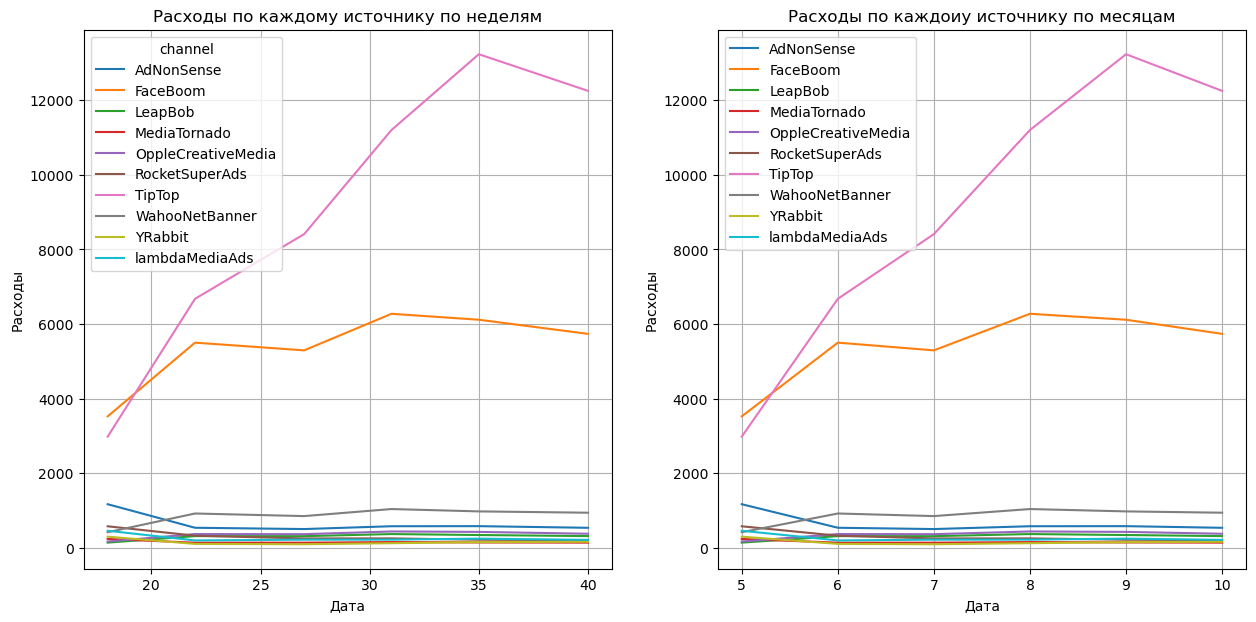

In [45]:
channels_costs = costs.pivot_table(index='channel', columns='costs_week', values='costs', aggfunc='sum')
ax1 = plt.subplot(1, 2, 1)
channels_costs.T.plot(grid=True, ax=ax1, figsize=(15, 7))
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.title('Расходы по каждому источнику по неделям')

channels_costs = costs.pivot_table(index='channel', columns='costs_month', values='costs', aggfunc='sum')
ax2 = plt.subplot(1, 2, 2)
channels_costs.T.plot(grid=True, ax=ax2, figsize=(15, 7))
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.title('Расходы по каждоиу источнику по месяцам')
plt.show()

plt.show()


<em> Максимальные затраты на привлечение новых пользователей расходовались на каналы TipTop и FaceBoom; <br> Затраты на TipTop возрастали от 2.5 до 13 тысяч; <br> Затраты на FaceBoom от 4 до 6 тысяч.

In [46]:
profiles.groupby('channel').agg ({'acquisition_cost': 'mean'}).sort_values('acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


<em> В среднем стоимость привлечения пользователя в TipTop была 2.799003, а в FaceBoom 1.113286, что подтверждает наш предыдущий вывод; <br> Также стоимость пользователя в AdNonSence почти совпадает с FaceBoom, однако этот источник принёс только 5% пользователей.

## Оценка окупаемости рекламы

<em> Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- <em> Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;
- <em> Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания;
- <em> Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
- <em> Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
- <em> Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
- <em> Ответим на такие вопросы:
    1. <em> Окупается ли реклама, направленная на привлечение пользователей в целом?
    2. <em> Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    3. <em> Чем могут быть вызваны проблемы окупаемости?

In [47]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14  

In [48]:
profiles = profiles.query('channel !="organic"')

<em> При оценке окупаемости рекламы органические пользователи не учитываются

### Общая окупаемость рекламы

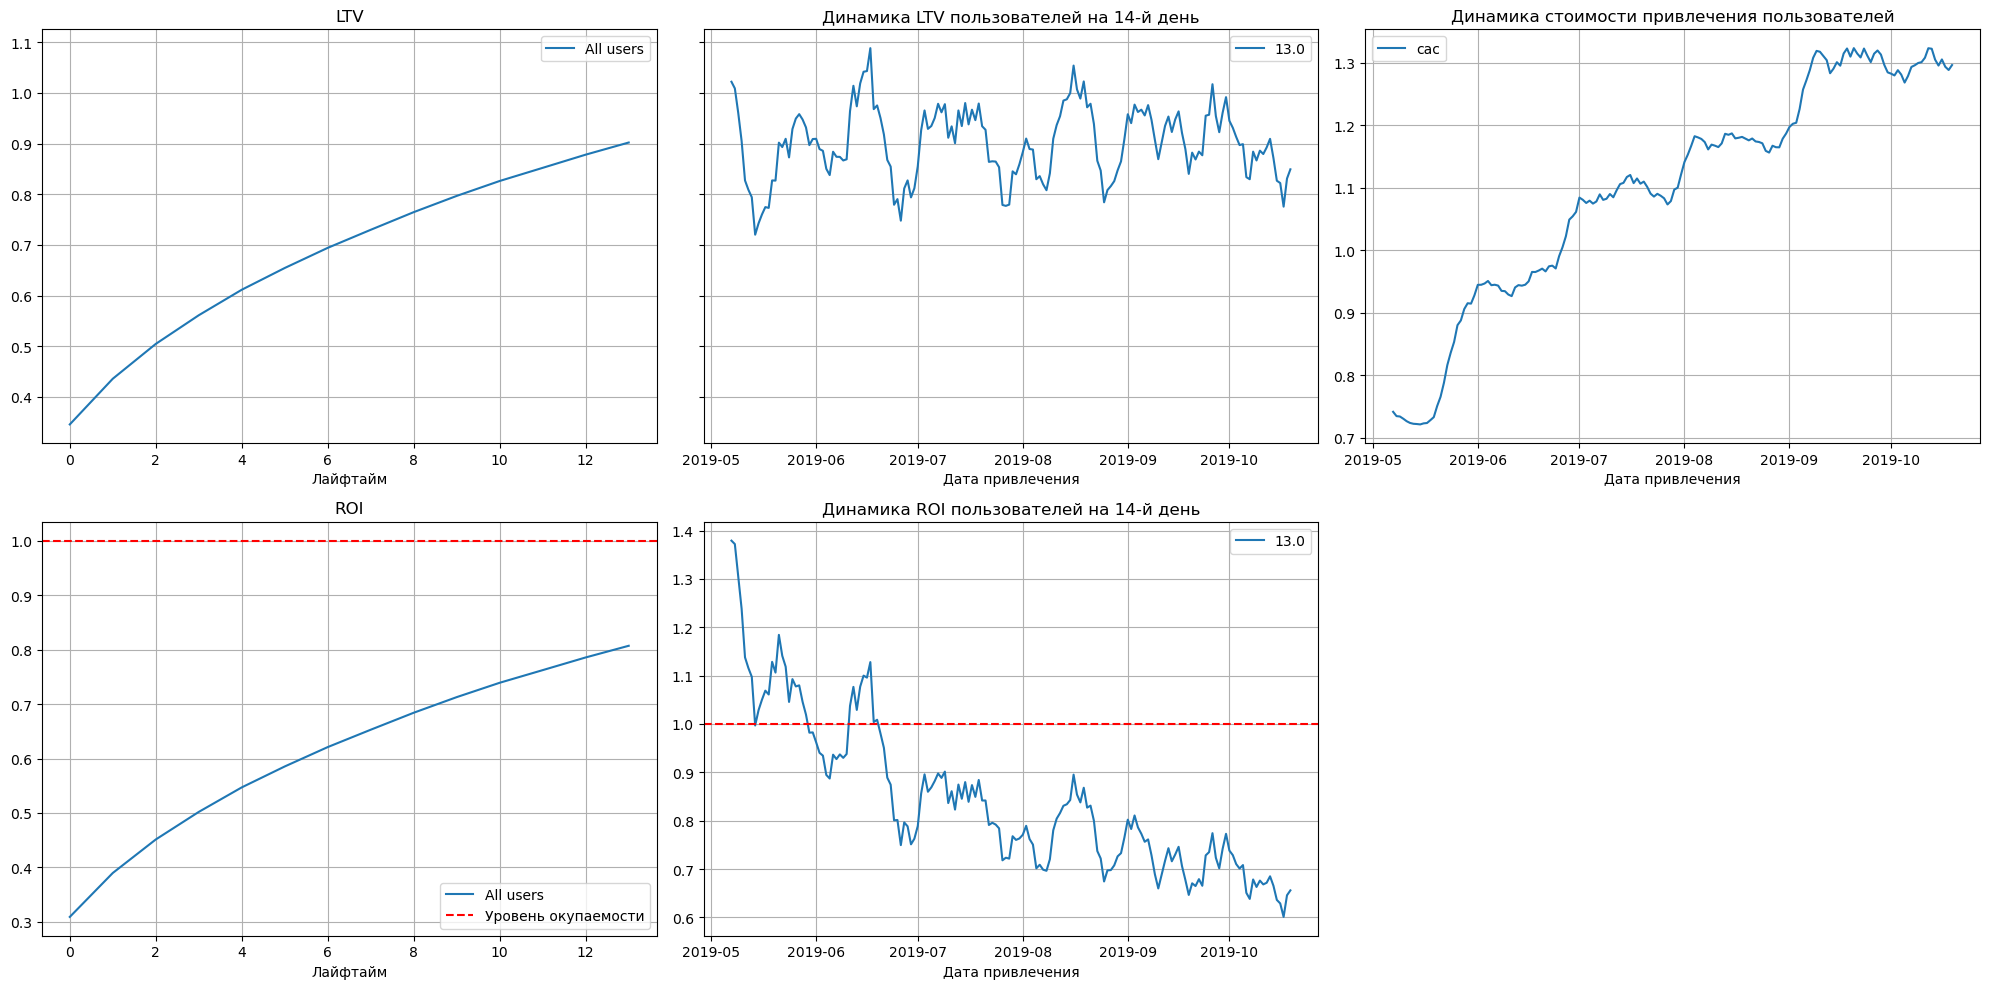

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<em> Рекламная компания имеет низкую эффективность; <br> Показатель ROI не достигает 1 и концу второй недели снижается; <br> В мае 2019 ситуация была положительной ROI был выше 1, но с каждым месяцем показатели ухудшались; <br> Динамика LTV сезонная; <br> Одновременно с паданием ROI, стал увеличиваться CAC.

### Конверсия пользователей

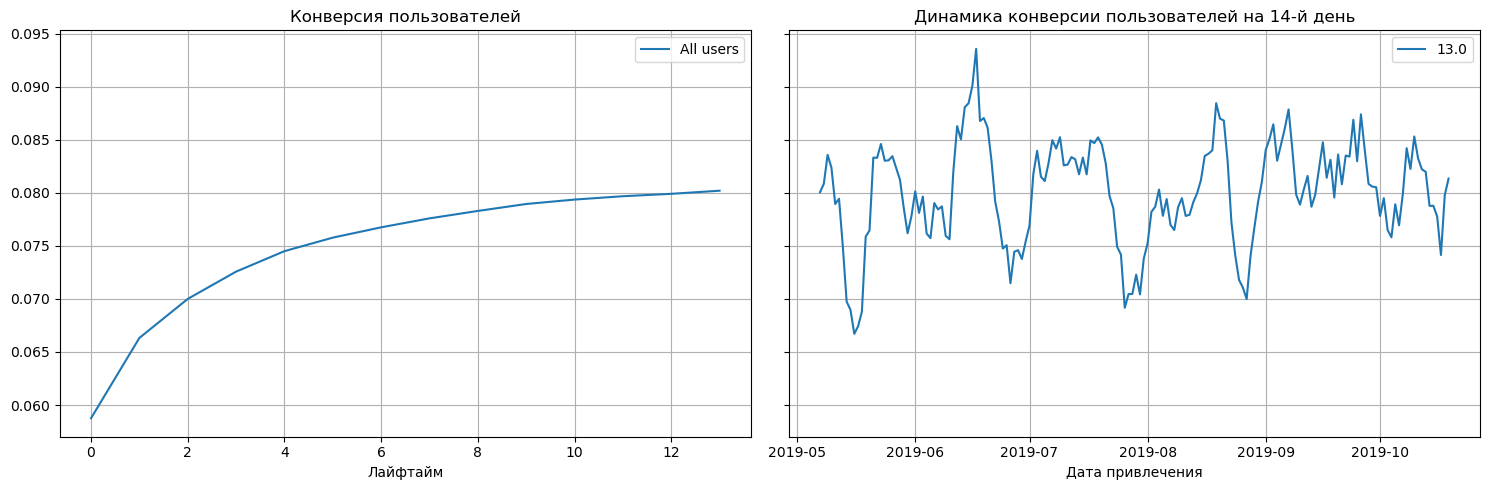

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

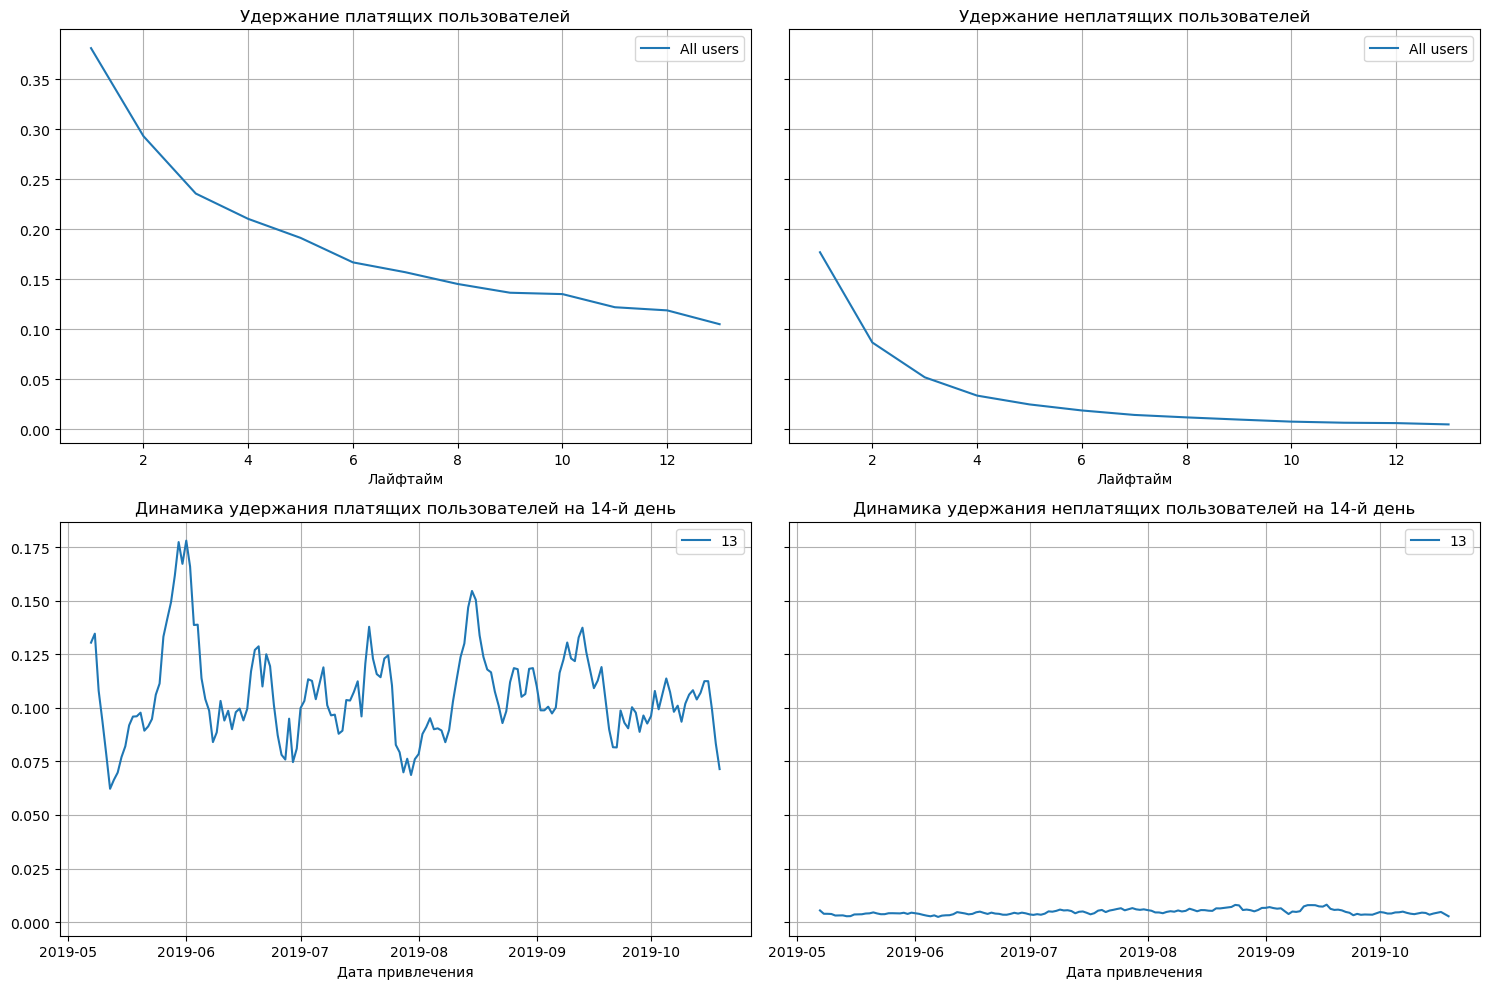

In [51]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

<em> Конверсия пользователей увеличивается, однако пользователи плохо удерживаются.

### Окупаемость рекламы с разбивкой по устройствам

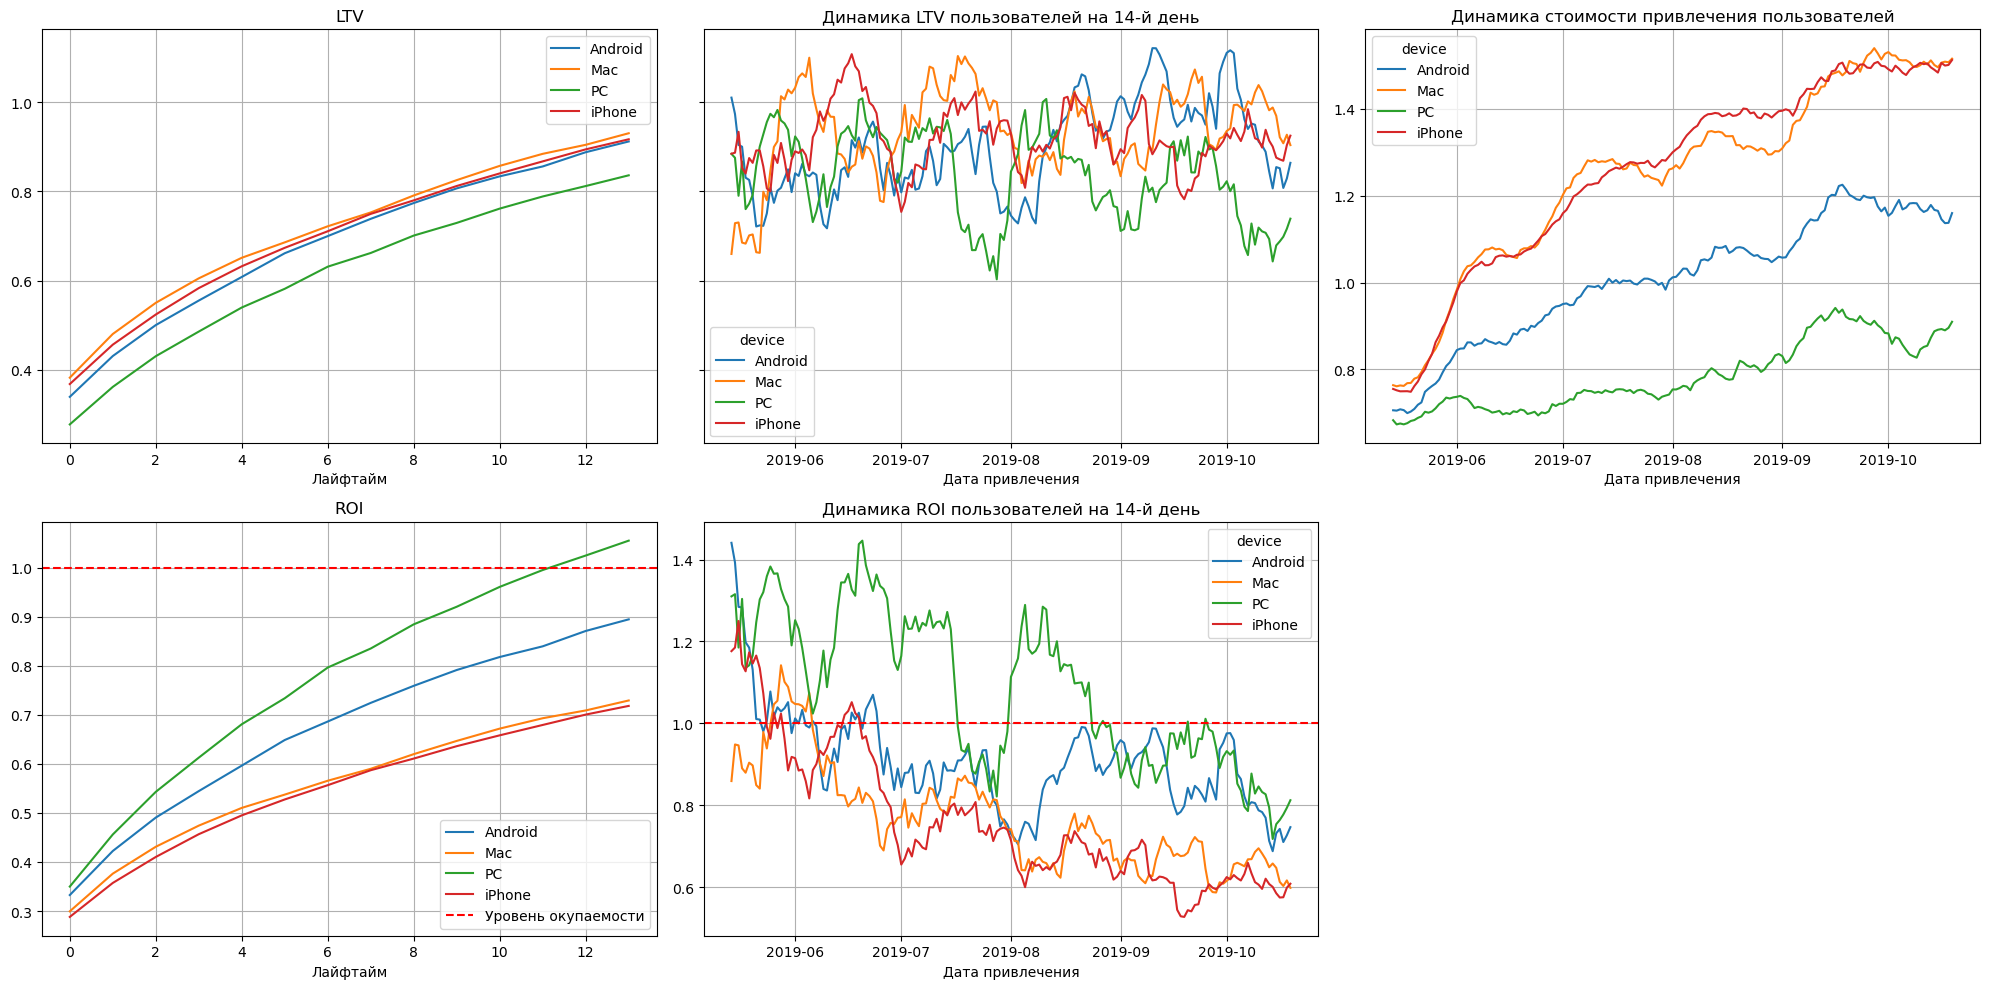

In [52]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

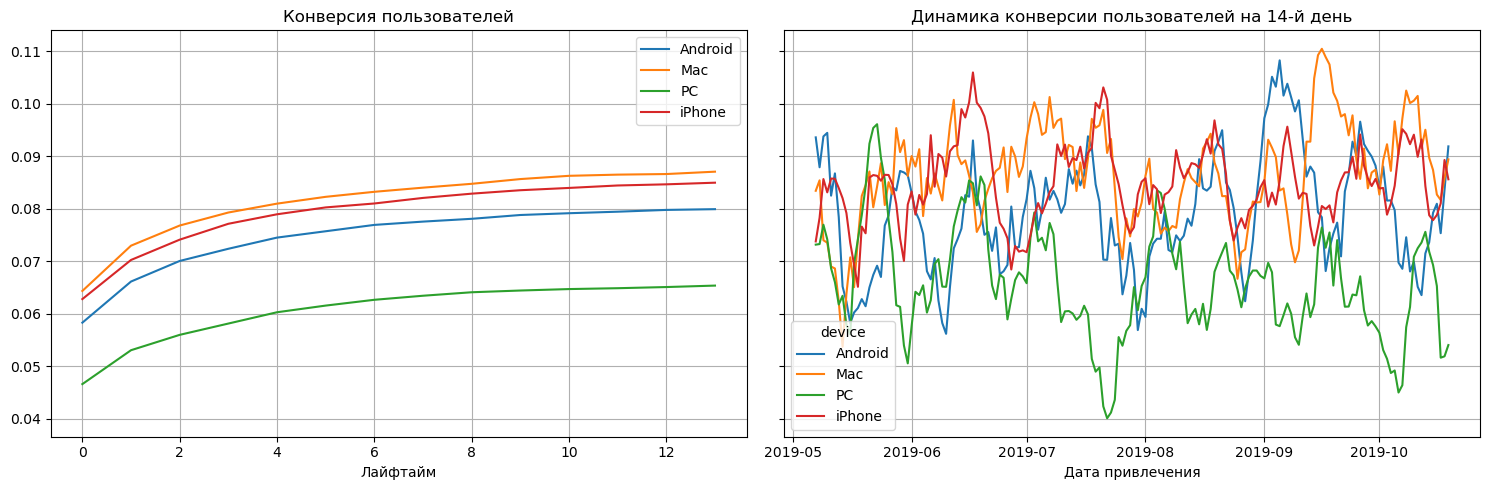

In [53]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

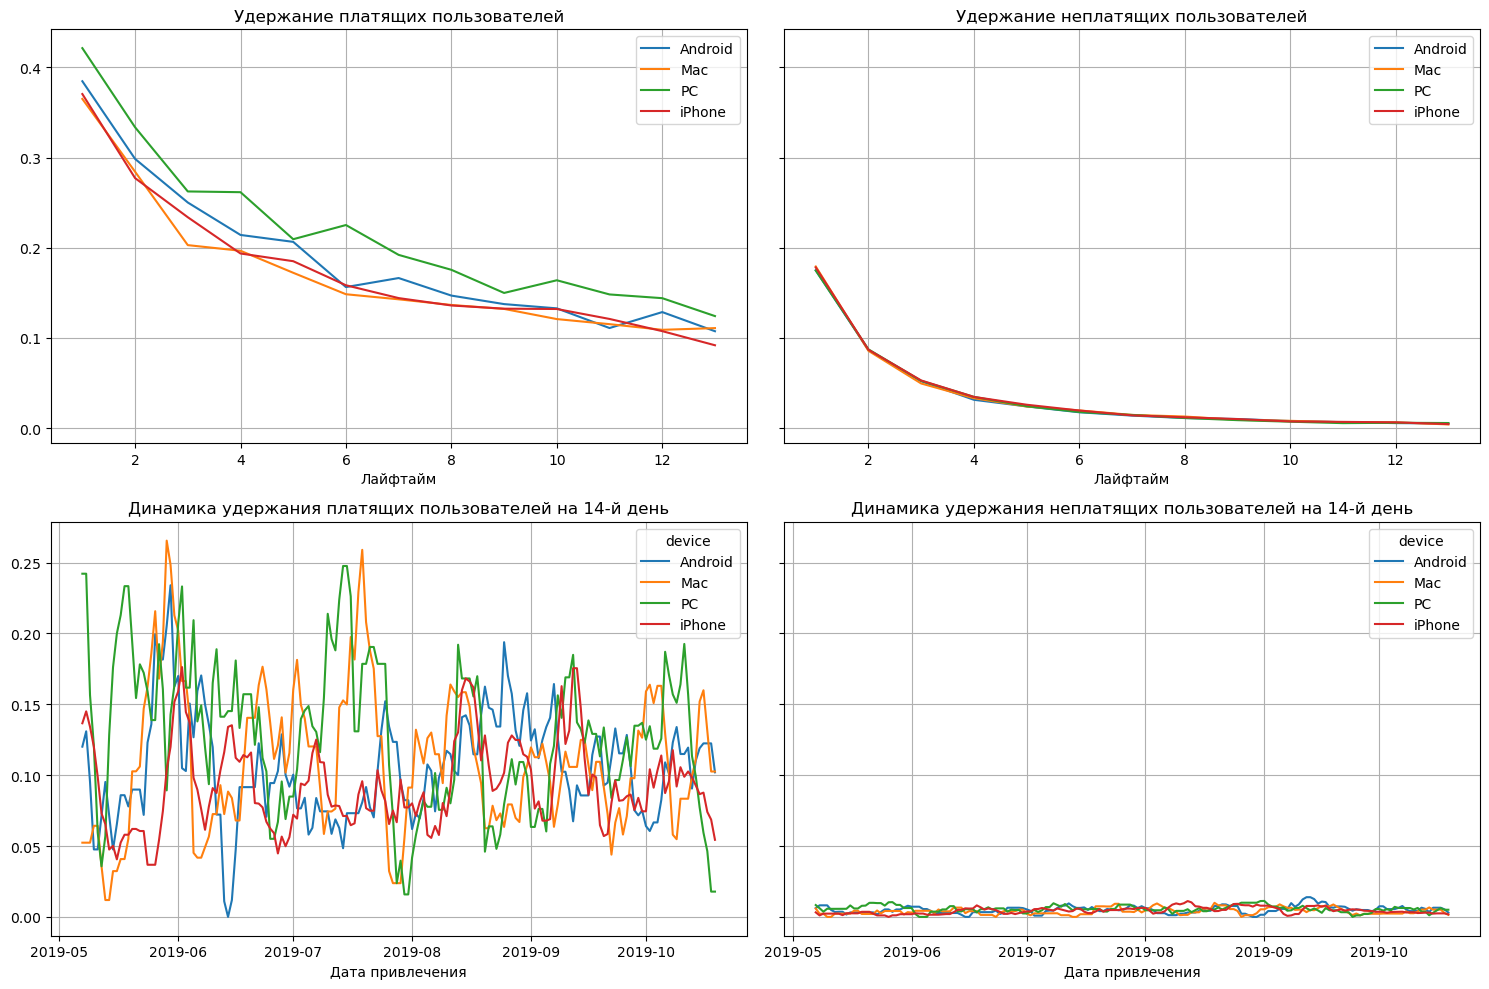

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<em> Конверсия пользователей PC ниже остальных устройств; <br> Динамика удержания нестабильна до августа.

<em> Пользователи с PC окупаются весь лайфтайм; <br> Мас и Iphone не окупаются весь период анализа; <br> Пользователи Android также не окупаются, однако имеются скачки до 1 на протяжении лайфтайма; <br> САС для пользователей Android и Iphone увеличивался с течением времени.

### Окупаемость рекламы с разбивкой по странам

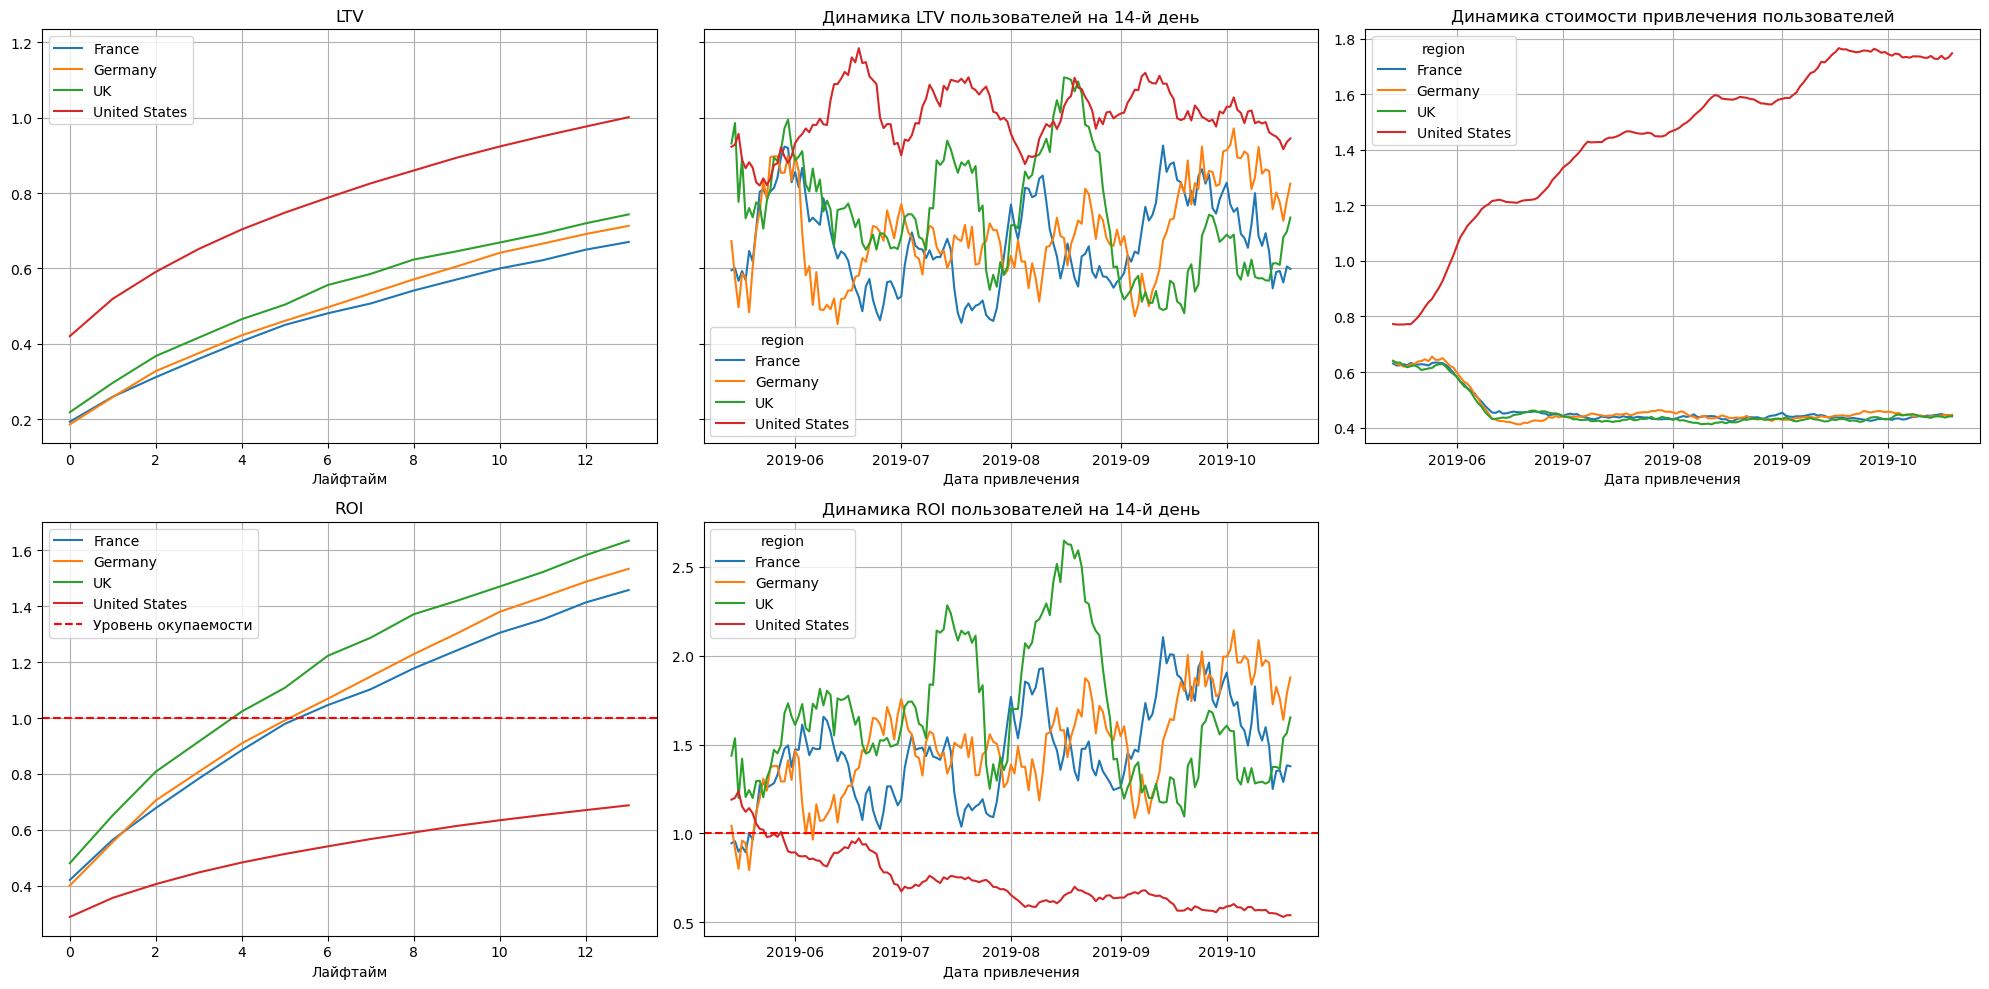

In [55]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<em> На графиках наблюдаем резкий контраст между пользователями из США и другими странами; <br> Несмотря на более высокий LTV, пользователи из США имеют ROI меньше 1 на всём лайфтаме и резкое уведичение CAC; <br> Для стран Eвропы показатели отличные, они окупаются на всём периоде анализа.

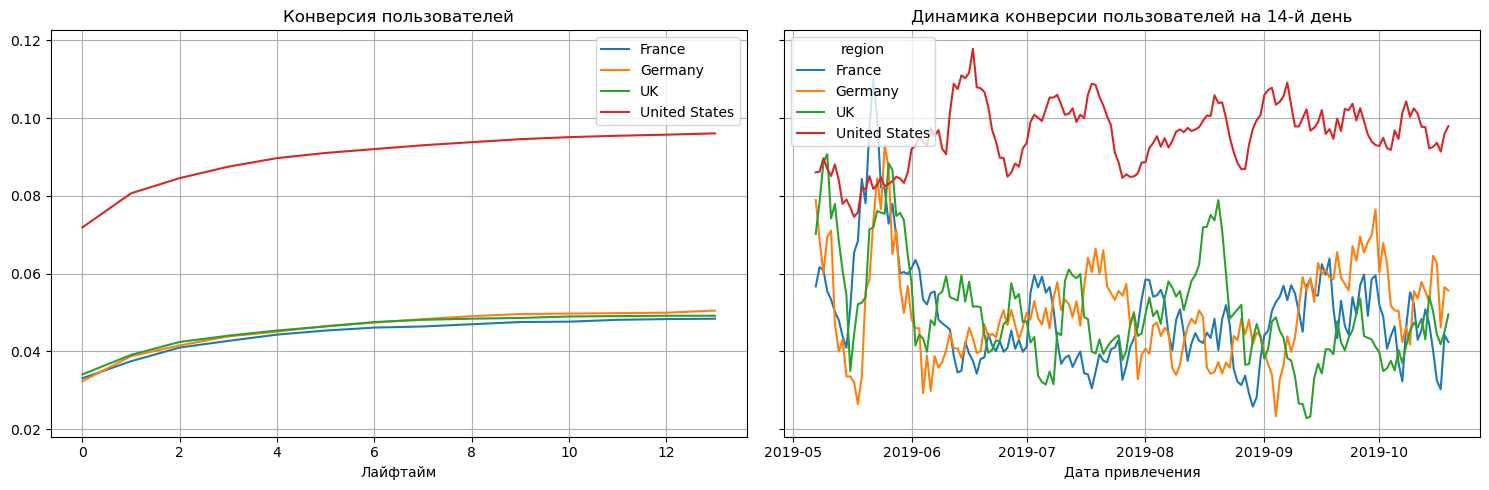

In [56]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

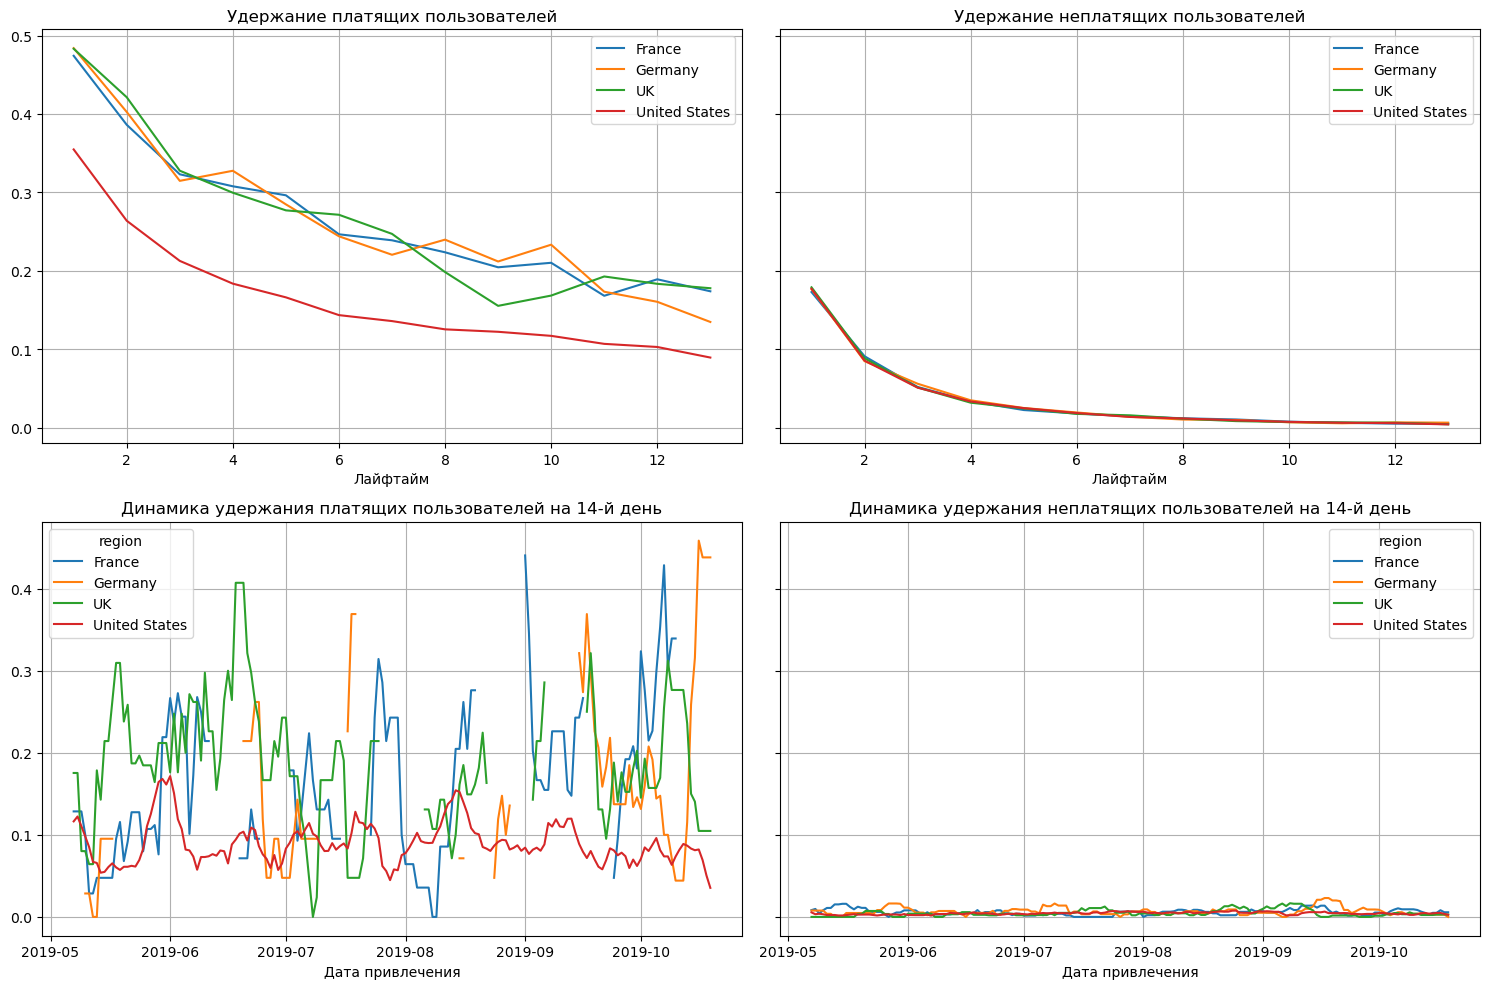

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<em> Несмотря на высокую конверсию пользователей из США, удержание наименьшее.

### Окупаемость рекламы с разбивкой по рекламным каналам

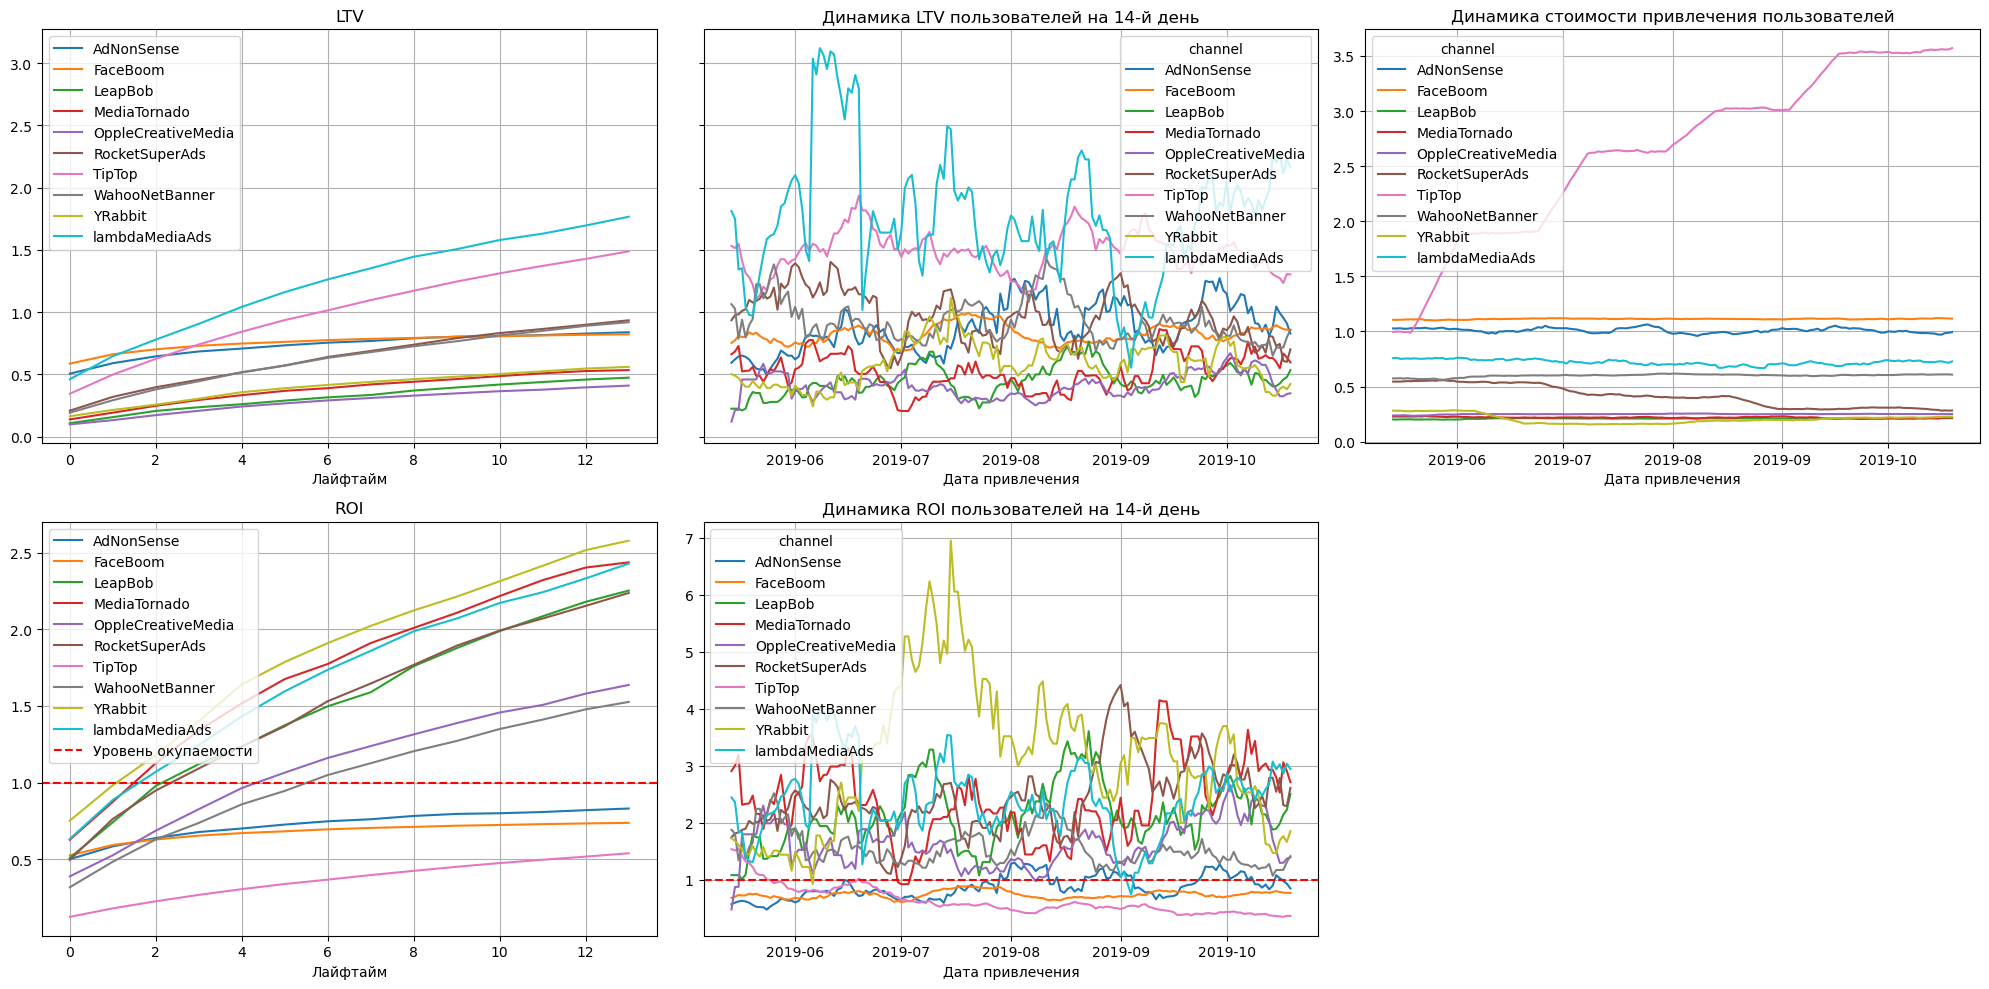

In [58]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<em> Несмотря на значительный процент привлечённых пользователей каналы TipTop и FaceBoom не окупаются; <br> ROI меньше 1 на всём периоде.

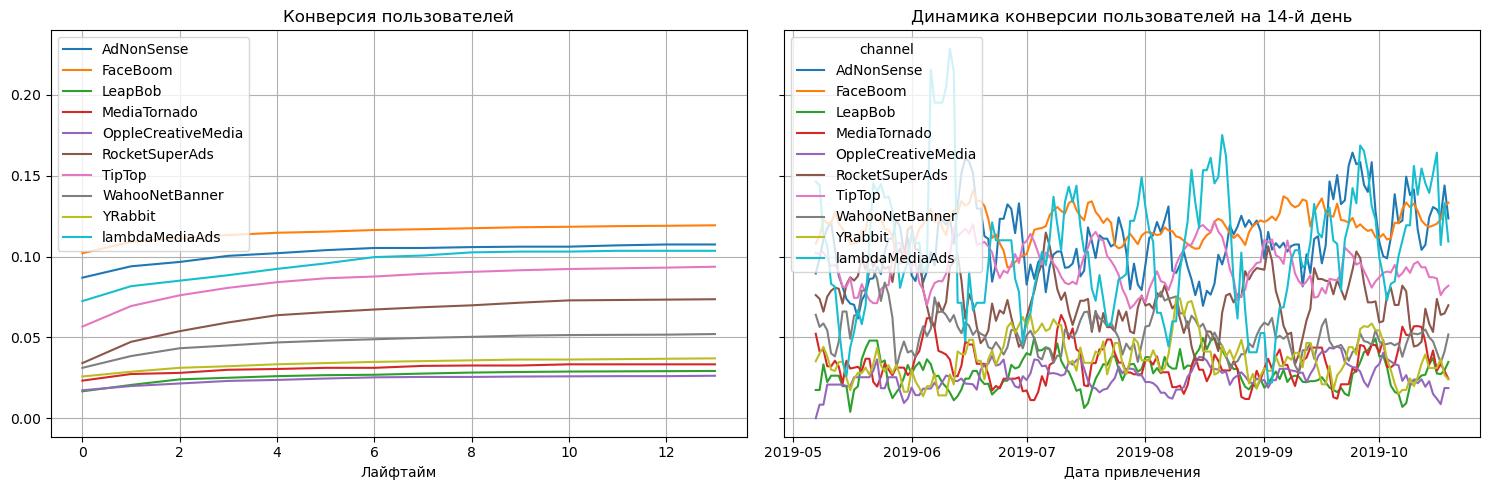

In [59]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

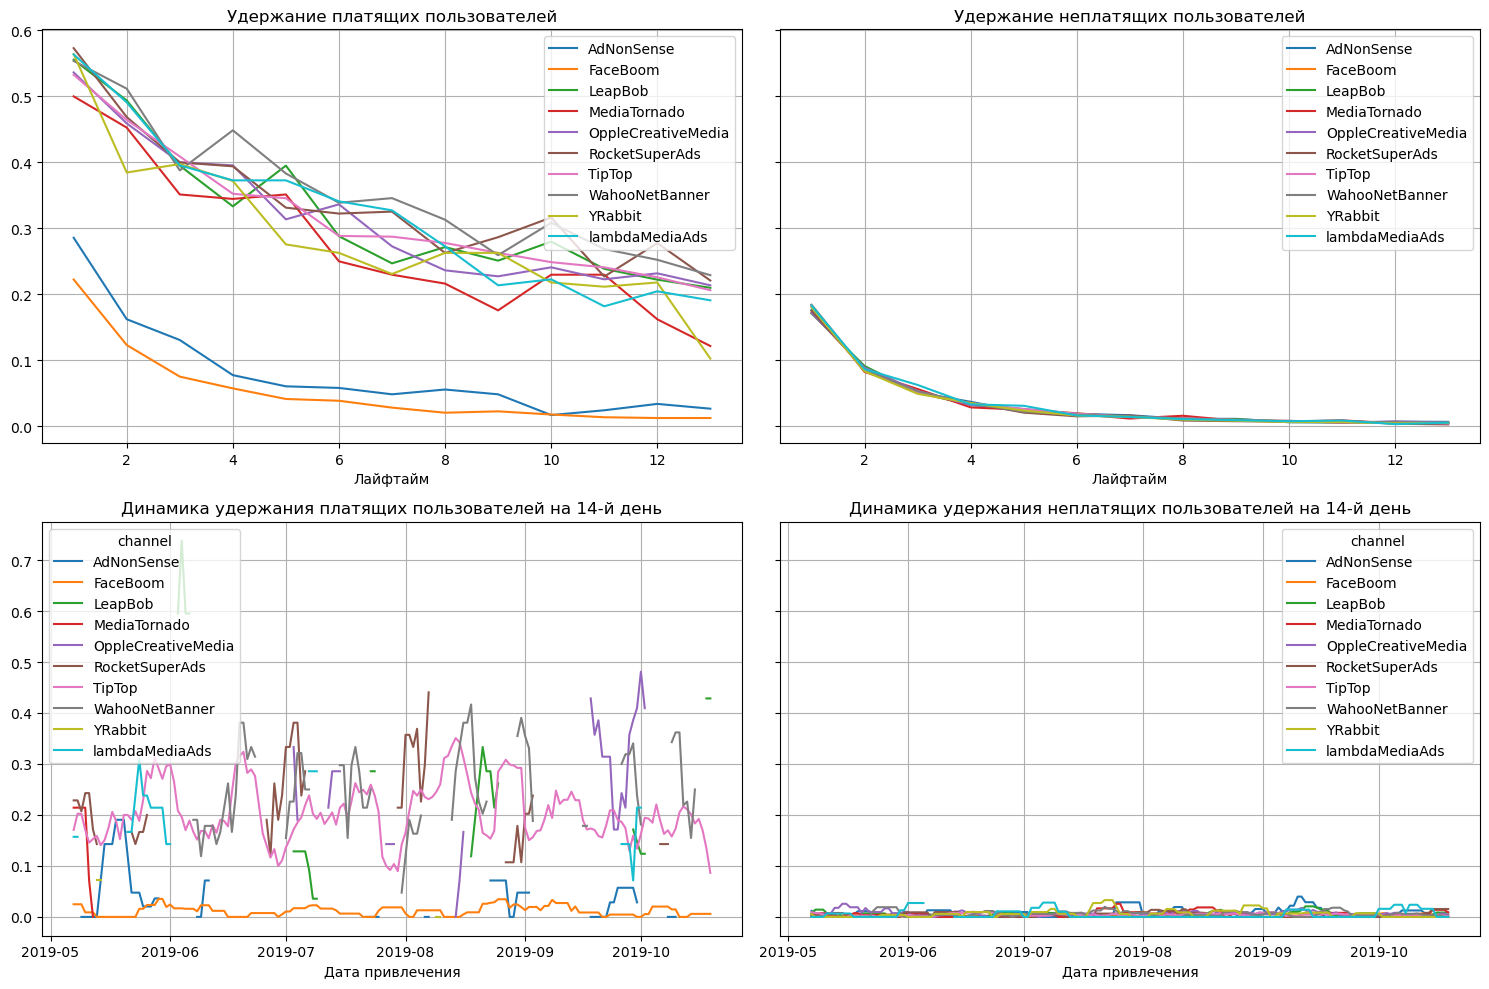

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<em> Конверсии каналов FaceBoom, AdNonSence и lambdaMeidaAdc выше 0.1; <br> На лайфтайме наблюдаются резкие скачки каналов AdNonSence и lambdaMeidaAdc; <br> Относительно стабильно выглядит конверсия FaceBoom; <br> Значение удержания пользователей FaceBoom и AdNonSence значительно ниже других каналов.

## Выводы

- <em> В исследовании используются данные о новых пользователей, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, сведениях об их покупках за этот период, а также статистика рекламных расходов; 
- <em>Наибольшее число пользователей приходят из США , процент платящих почти 7%, в европейских странах платящих пользователей около 4% <br>
- <em> Наиболее популярным устройсвом является Iphone, число платящих пользователей 6.2%; 
- <em> Популярные каналы привлечения платных пользователей FaceBoom 40.05% и TipTop 21.15%, огранических пользователей 13.06%, остальные каналы вносят менее значительный вклад по платящим пользователям менее 5.1%;
- <em> Общая сумма расходов на маркетинг составила 105497.3 долларов. Максимальные затраты на привлечение новых пользователей расходовались на каналы TipTop и FaceBoom. Затраты на TipTop возрастали от 2.5 до 13 тысяч долларов. Затраты на FaceBoom от 4 до 6 тысяч долларов;
- <em> В среднем стоимость привлечения пользователя в TipTop была 2.799003, а в FaceBoom 1.113286, что подтверждает наш предыдущий вывод, также стоимость пользователя в AdNonSence почти совпадает с FaceBoom, однако этот источник принёс только 5% пользователей;
- <em> Рекламная компания провальна, начиная с лета 2019 года ROI стабильно падал, САС рос;
- <em> Каналы с наибольшими инвестициями TipTop и FaceBoom не окупились;
- <em> США проблемный регион, ROI меньше 1 на всём лайфтайме, САС имеет резкий рост начиная с лета;
- <em> Пользователи Mac и Iphone также не окупились, это также может быть связано с тем что этот продукт имеет большую популярность на американском рынке.

## Рекомендации
1. <em> Стоит улучшить удержание пользователей из США. У них хорошие показатели СR и LTV, но удержание хуже чем в европейских странах. Возомжно улучшить программу лояльности, добавить скидки, бонусы, ведь клиенты из США являются основными;
2. <em> Рассмотреть расширение продукта на европейский рынок. Пользователи из Европы имеют хорошие показатели конверсии, удержания и окупаемости;
3. <em> Основная часть инвестиций расходуется на каналы FaceBoom и TipTop. Они оба не окупаются. Стоит рассмотреть инвестиции в каналы YRabbit, lambdaMediaAds и MediaTornado.

---